### IL-23 DMS Raw Data Review

1. [Preliminaries](#part1)
2. [Load Raw Barcode Counts](#part2)
3. ["Unsupervised" Differential Barcode Expression](#part3)
4. [Summary Statistics](#part4)
5. [Labeling Mapped and Unmapped Barcodes](#part5)
6. [Characterization of Significant Barcodes](#part6)
7. [Assay 6 Barcode Heatmaps](#part7)

#### Preliminaries <a name="part1"></a>

To evaluate whether latent barcode mapping errors are scrambling variant-specific signals in the IL-23 DMS datasets, we extract the raw barcode counts from the following datasets and samples:
  -  Assay6, None and IL-23, 100 ng/mL
  -  Assay7, None and IFN-alpha, 100 U/mL
  -  Assay8, None and IFN-alpha, 100 U/mL
  -  Assay9, None and IL-23, 10 ng/mL

For IL-23, these are the closest cytokine-treated conditions across the two datasets. For each dataset except Assay9 there are four replicates per condition, and in Assay9 there are three replicates per condition.

In [18]:
library(fs)
library(ggseqlogo)
library(ggpubr)
library(knitr)
library(patchwork)
library(DESeq2)
library(fastcluster)
library(parallelDist)
library(fastcluster)
library(pheatmap)
library(tidyverse)

In [3]:
load_assay_data <- function(files, n_samp){

    assay_data <- files %>% map_dfr(read_tsv,
                                    col_names = c("count", "barcode"),
                                    .id = "sample")
    
    assay_filtered <- assay_data %>%
        group_by(barcode) %>%
        filter(n() == n_samp)
    
    assay_matrix <- assay_filtered %>% pivot_wider(names_from = sample, values_from = count)

    return(assay_matrix)
}

compute_barcode_DE <- function(data_mat, metadata){
    
    dds <- DESeqDataSetFromMatrix(data_mat[,-1], colData = metadata, design = ~group)
    dds <- DESeq(dds)
    sumstats <- results(dds) %>% as_tibble()
    sumstats$barcode <- data_mat$barcode

    return(sumstats)
}

#### Load Raw Barcode Counts  <a name="part2"></a>

We begin by reading in the raw barcode counts for the relevant conditions from each assay dataset, and filtering to require that any retrieved barcodes be present (have a non-zero count) in all samples from the chosen two conditions per assay.

In [42]:
bc_dir <- "../pipeline/OCNT-DMSLIB-1-assay-run6/"
files <- c(dir_ls(bc_dir, glob = "*/3*bcs.tsv"),
           dir_ls(bc_dir, glob = "*/2*bcs.tsv"))
names(files) <- gsub(str_c(bc_dir, "|.rna-bcs.tsv"), "", files)
assay6_mat_gdna <- load_assay_data(files, 8)

Rows: 1056866 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): barcode
dbl (1): count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1090592 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): barcode
dbl (1): count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1068963 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): barcode
dbl (1): count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1044201 Columns: 2
── Column specification ────────────────────────

In [7]:
bc_dir <- "../pipeline/OCNT-DMSLIB-1-assay-run6/"
files <- c(dir_ls(bc_dir, glob = "*/1*bcs.tsv"),
           dir_ls(bc_dir, glob = "*/2*bcs.tsv"))
names(files) <- gsub(str_c(bc_dir, "|.rna-bcs.tsv"), "", files)
assay6_mat <- load_assay_data(files, 8)

Rows: 1614467 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): barcode
dbl (1): count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1240089 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): barcode
dbl (1): count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1446148 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): barcode
dbl (1): count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 977748 Columns: 2
── Column specification ─────────────────────────

In [8]:
bc_dir <- "../pipeline/OCNT-DMSLIB-1-assay-run7/"
files <- c(dir_ls(bc_dir, glob = "*/1*bcs.tsv"),
           dir_ls(bc_dir, glob = "*/2*bcs.tsv"))
names(files) <- gsub(str_c(bc_dir, "|.rna-bcs.tsv"), "", files)
assay7_mat <- load_assay_data(files, 8)

Rows: 2494762 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): barcode
dbl (1): count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2371292 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): barcode
dbl (1): count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2382647 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): barcode
dbl (1): count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2252691 Columns: 2
── Column specification ────────────────────────

In [9]:
bc_dir <- "../pipeline/OCNT-DMSLIB-1-assay-run8/"
files <- c(dir_ls(bc_dir, glob = "*/1*bcs.tsv"),
           dir_ls(bc_dir, glob = "*/2*bcs.tsv"))
names(files) <- gsub(str_c(bc_dir, "|.rna-bcs.tsv"), "", files)
assay8_mat <- load_assay_data(files, 8)

Rows: 2493449 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): barcode
dbl (1): count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2699957 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): barcode
dbl (1): count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2690546 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): barcode
dbl (1): count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2522659 Columns: 2
── Column specification ────────────────────────

In [10]:
bc_dir <- "../pipeline/OCNT-DMSLIB-1-assay-run9/"
files <- c(dir_ls(bc_dir, glob = "*/1*bcs.tsv"),
           dir_ls(bc_dir, glob = "*/3*bcs.tsv"))
names(files) <- gsub(str_c(bc_dir, "|.rna-bcs.tsv"), "", files)
assay9_mat <- load_assay_data(files, 6)

Rows: 937053 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): barcode
dbl (1): count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1128996 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): barcode
dbl (1): count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 959554 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): barcode
dbl (1): count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1093756 Columns: 2
── Column specification ──────────────────────────

#### "Unsupervised" Differential Barcode Expression  <a name="part3"></a>

For each assay, we have a cytokine-treated condition with replicates and a control condition (always `None`) with replicates. Thus, without using the barcode map, we can consider each barcode a "gene" and evaluate whether each barcode is significantly more or less abundant in cytokine-treated samples compared to `None` samples. Note that in all assays we will have four replicates per condition, except for assay 9 which has three.

In [44]:
coldata <- tibble("group" = c("A","A","A","A","B","B","B","B"))
rownames(coldata) <- names(assay6_mat_gdna)[-1]
assay6_sumstats_gdna <- compute_barcode_DE(assay6_mat_gdna, coldata)

Warning message:
“Setting row names on a tibble is deprecated.”
converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [12]:
coldata <- tibble("group" = c("A","A","A","A","B","B","B","B"))
rownames(coldata) <- names(assay6_mat)[-1]
assay6_sumstats <- compute_barcode_DE(assay6_mat, coldata)

Warning message:
“Setting row names on a tibble is deprecated.”
converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [13]:
coldata <- tibble("group" = c("A","A","A","A","B","B","B","B"))
rownames(coldata) <- names(assay7_mat)[-1]
assay7_sumstats <- compute_barcode_DE(assay7_mat, coldata)

Warning message:
“Setting row names on a tibble is deprecated.”
converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [14]:
coldata <- tibble("group" = c("A","A","A","A","B","B","B","B"))
rownames(coldata) <- names(assay8_mat)[-1]
assay8_sumstats <- compute_barcode_DE(assay8_mat, coldata)

Warning message:
“Setting row names on a tibble is deprecated.”
converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [15]:
coldata <- tibble("group" = c("A","A","A","B","B","B"))
rownames(coldata) <- names(assay9_mat)[-1]
assay9_sumstats <- compute_barcode_DE(assay9_mat, coldata)

Warning message:
“Setting row names on a tibble is deprecated.”
converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing



#### Summary Statistics  <a name="part4"></a>

For each of the four comparisons (treated vs untreated in each assay), we can extract and plot the distributions of Z-statistics as we would for evaluating a "typical" set of DMS summary statistics, but without a label indicating the TYK2 variant identity of each barcode:

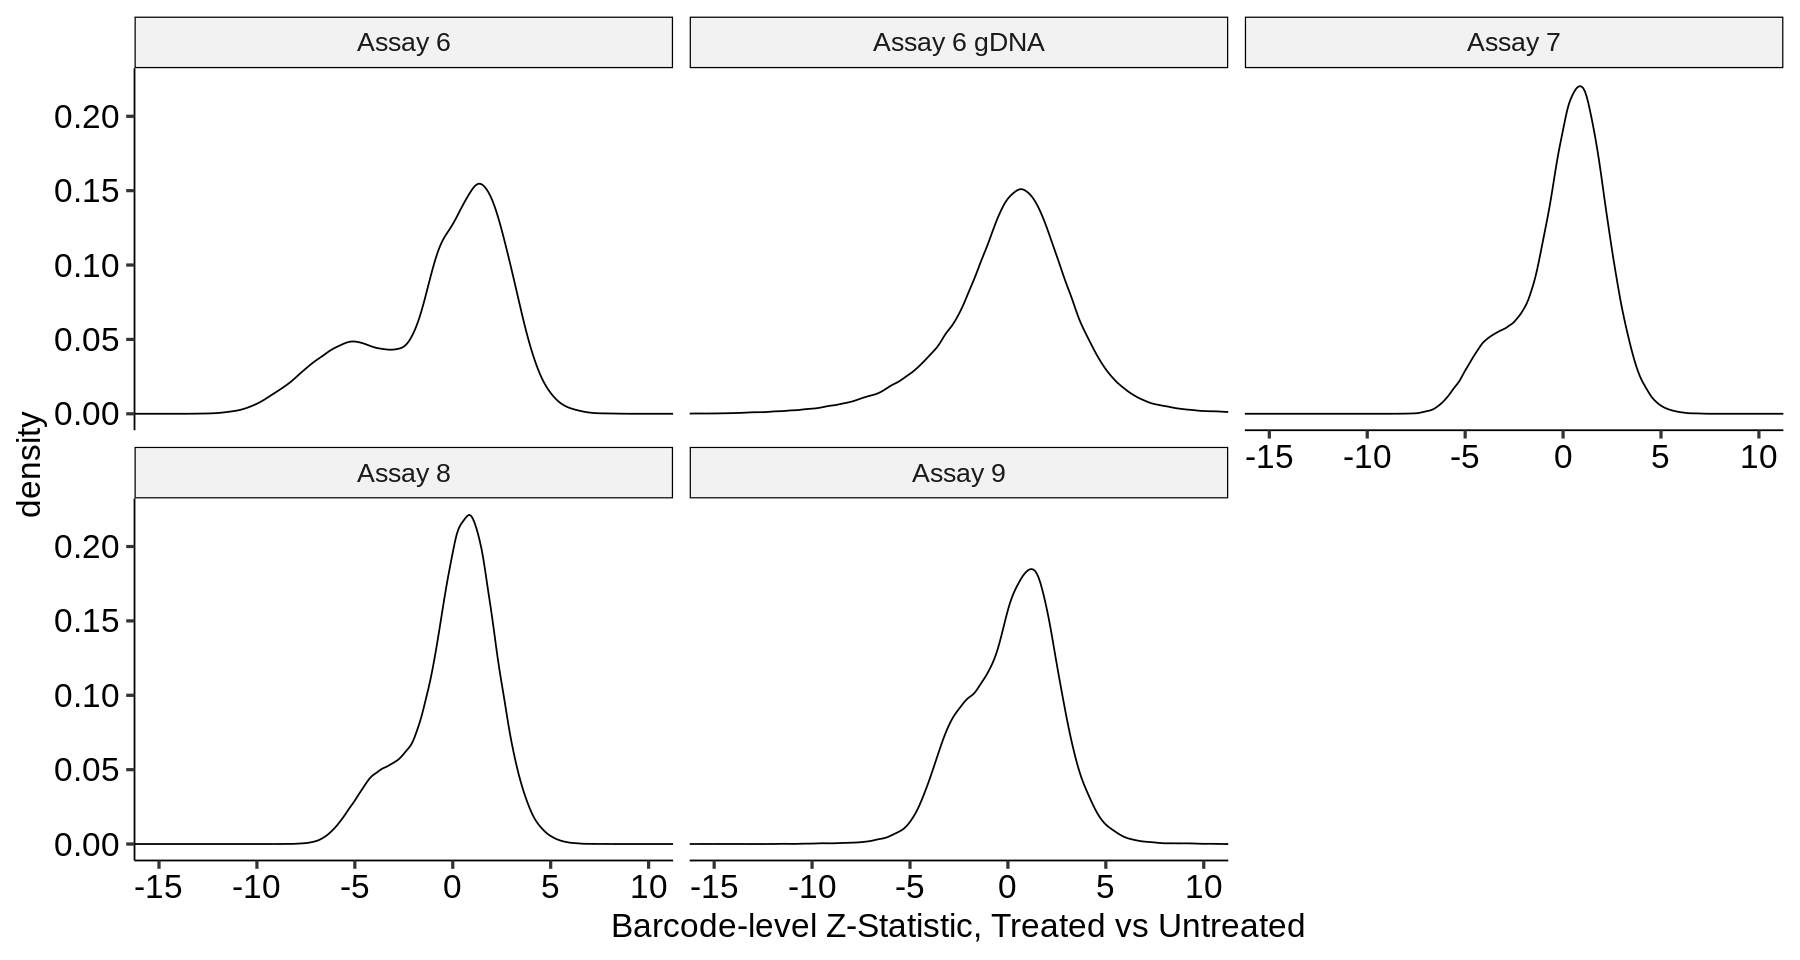

In [50]:
options(repr.plot.width = 15, repr.plot.height = 8)
bind_rows(list("Assay 6 gDNA" = assay6_sumstats_gdna,
               "Assay 6" = assay6_sumstats,
               "Assay 7" = assay7_sumstats,
               "Assay 8" = assay8_sumstats,
               "Assay 9" = assay9_sumstats),
          .id = "assay") %>% 
    ggplot() +
        geom_density(aes(x = stat)) +
        facet_wrap(~assay, ncol = 3) +
        theme_pubr(base_size = 20) +
        xlab("Barcode-level Z-Statistic, Treated vs Untreated") +
        coord_cartesian(xlim = c(-15, 10))

Similarly, we can evaluate the correlation between log2 fold changes between each assay treated with the same cytokine. Again, we do not yet have labels indicating barcode identity but can match barcodes between assays based on sequence alone:

In [52]:
assay6_assay9_lfc <- bind_rows(list("Assay 6" = assay6_sumstats,
               "Assay 9" = assay9_sumstats), .id = "assay") %>% 
    select(barcode, assay, log2FoldChange) %>%
    pivot_wider(names_from = assay, values_from = log2FoldChange) %>% 
    ggplot() +
        geom_point(aes(x = `Assay 6`, y = `Assay 9`), alpha = 0.2) +
        theme_pubr(base_size = 20) 

assay7_assay8_lfc <- bind_rows(list("Assay 7" = assay7_sumstats,
               "Assay 8" = assay8_sumstats), .id = "assay") %>% 
    select(barcode, assay, log2FoldChange) %>%
    pivot_wider(names_from = assay, values_from = log2FoldChange) %>% 
    ggplot() +
        geom_point(aes(x = `Assay 7`, y = `Assay 8`), alpha = 0.2) +
        theme_pubr(base_size = 20) 

Warning message:
“Removed 125408 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 84327 rows containing missing values (`geom_point()`).”


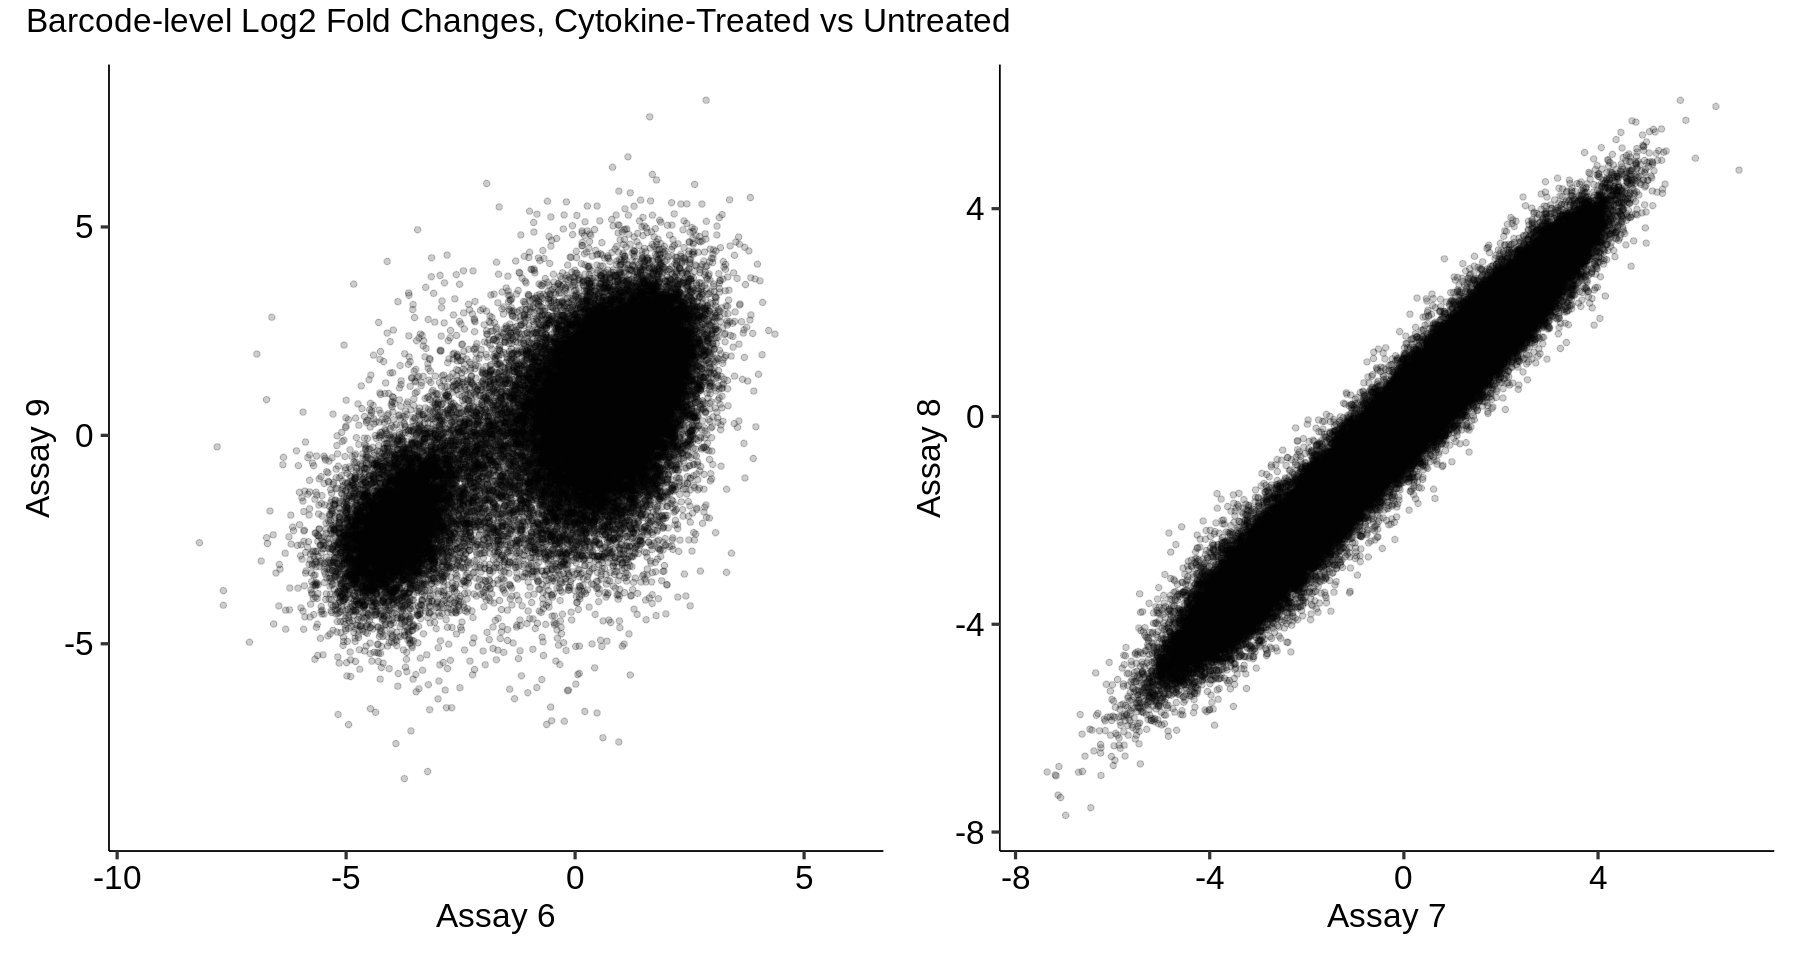

In [53]:
options(repr.plot.width = 15, repr.plot.height = 8)
assay6_assay9_lfc +
    assay7_assay8_lfc +
    plot_annotation(title = "Barcode-level Log2 Fold Changes, Cytokine-Treated vs Untreated") & 
    theme(plot.title = element_text(size = 20))

In [77]:
assay6_assay9_lfc_gdna <- bind_rows(list("Assay 6 gDNA" = assay6_sumstats_gdna,
               "Assay 9" = assay9_sumstats), .id = "assay") %>% 
    select(barcode, assay, log2FoldChange) %>%
    pivot_wider(names_from = assay, values_from = log2FoldChange) %>% 
    ggplot() +
        geom_point(aes(x = `Assay 6 gDNA`, y = `Assay 9`), alpha = 0.2) +
        theme_pubr(base_size = 20) 

Warning message:
“Removed 253457 rows containing missing values (`geom_point()`).”


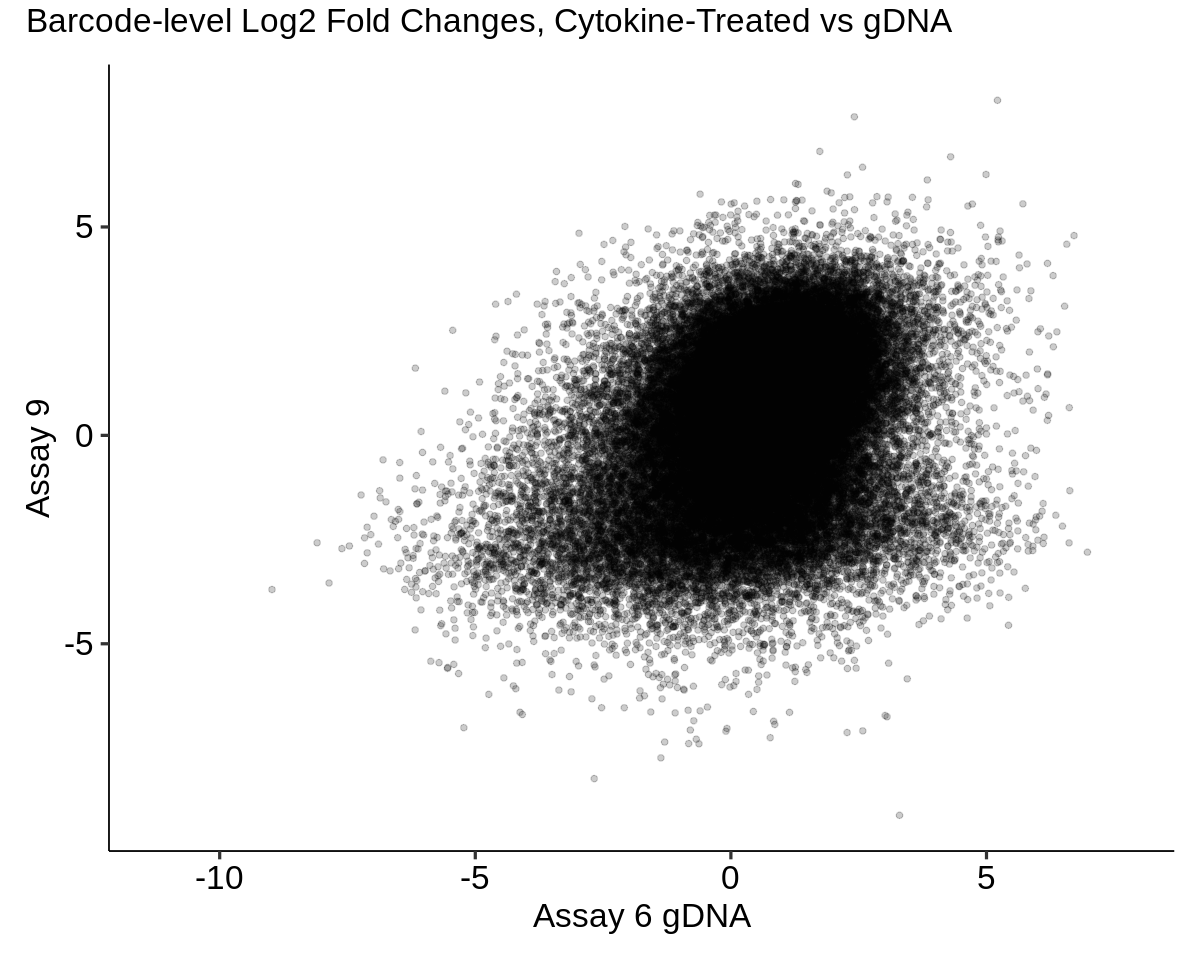

In [78]:
options(repr.plot.width = 10, repr.plot.height = 8)
assay6_assay9_lfc_gdna +
    plot_annotation(title = "Barcode-level Log2 Fold Changes, Cytokine-Treated vs gDNA") & 
    theme(plot.title = element_text(size = 20))

#### Labeling Mapped and Unmapped Barcodes  <a name="part5"></a>

Next, we label each barcode in the above distributions with the entry for that barcode in the TYK2 barcode map. This label might be missing, and if it is not missing it has a specific variant identity. The main variant identity we care about here is being `Stop` or `Non-Stop`.

In [58]:
remapped_assay6_missing <- read_tsv("../pipeline/assay6.bcs.tsv",
                                    col_names = c("barcode", "oligo")) %>%
    mutate(status = if_else(is.na(oligo), "missing", "mapped"))

assay6_sumstats_missing <- left_join(assay6_sumstats,
                                     remapped_assay6_missing,
                                     by = "barcode")

Rows: 8083568 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): barcode, oligo

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [63]:
assay6_sumstats_missing_gdna <- left_join(assay6_sumstats_gdna,
                                     remapped_assay6_missing,
                                     by = "barcode")

In [38]:
remapped_assay7_missing <- read_tsv("../pipeline/assay7.bcs.tsv",
                                    col_names = c("barcode", "oligo")) %>%
    mutate(status = if_else(is.na(oligo), "missing", "mapped"))

assay7_sumstats_missing <- left_join(assay7_sumstats,
                                     remapped_assay7_missing,
                                     by = "barcode")

Rows: 17069634 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): barcode, oligo

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [39]:
remapped_assay8_missing <- read_tsv("../pipeline/assay8.bcs.tsv",
                                    col_names = c("barcode", "oligo")) %>%
    mutate(status = if_else(is.na(oligo), "missing", "mapped"))

assay8_sumstats_missing <- left_join(assay8_sumstats,
                                     remapped_assay8_missing,
                                     by = "barcode")

Rows: 21437254 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): barcode, oligo

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [61]:
remapped_assay9_missing <- read_tsv("../pipeline/assay9.bcs.tsv",
                                    col_names = c("barcode", "oligo")) %>%
    mutate(status = if_else(is.na(oligo), "missing", "mapped"))

assay9_sumstats_missing <- left_join(assay9_sumstats,
                                     remapped_assay9_missing,
                                     by = "barcode")

Rows: 7838085 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): barcode, oligo

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Having labeled each barcode,  we can plot the same Z-statistic distributions as before but separate them within each assay by the barcode label from the map:

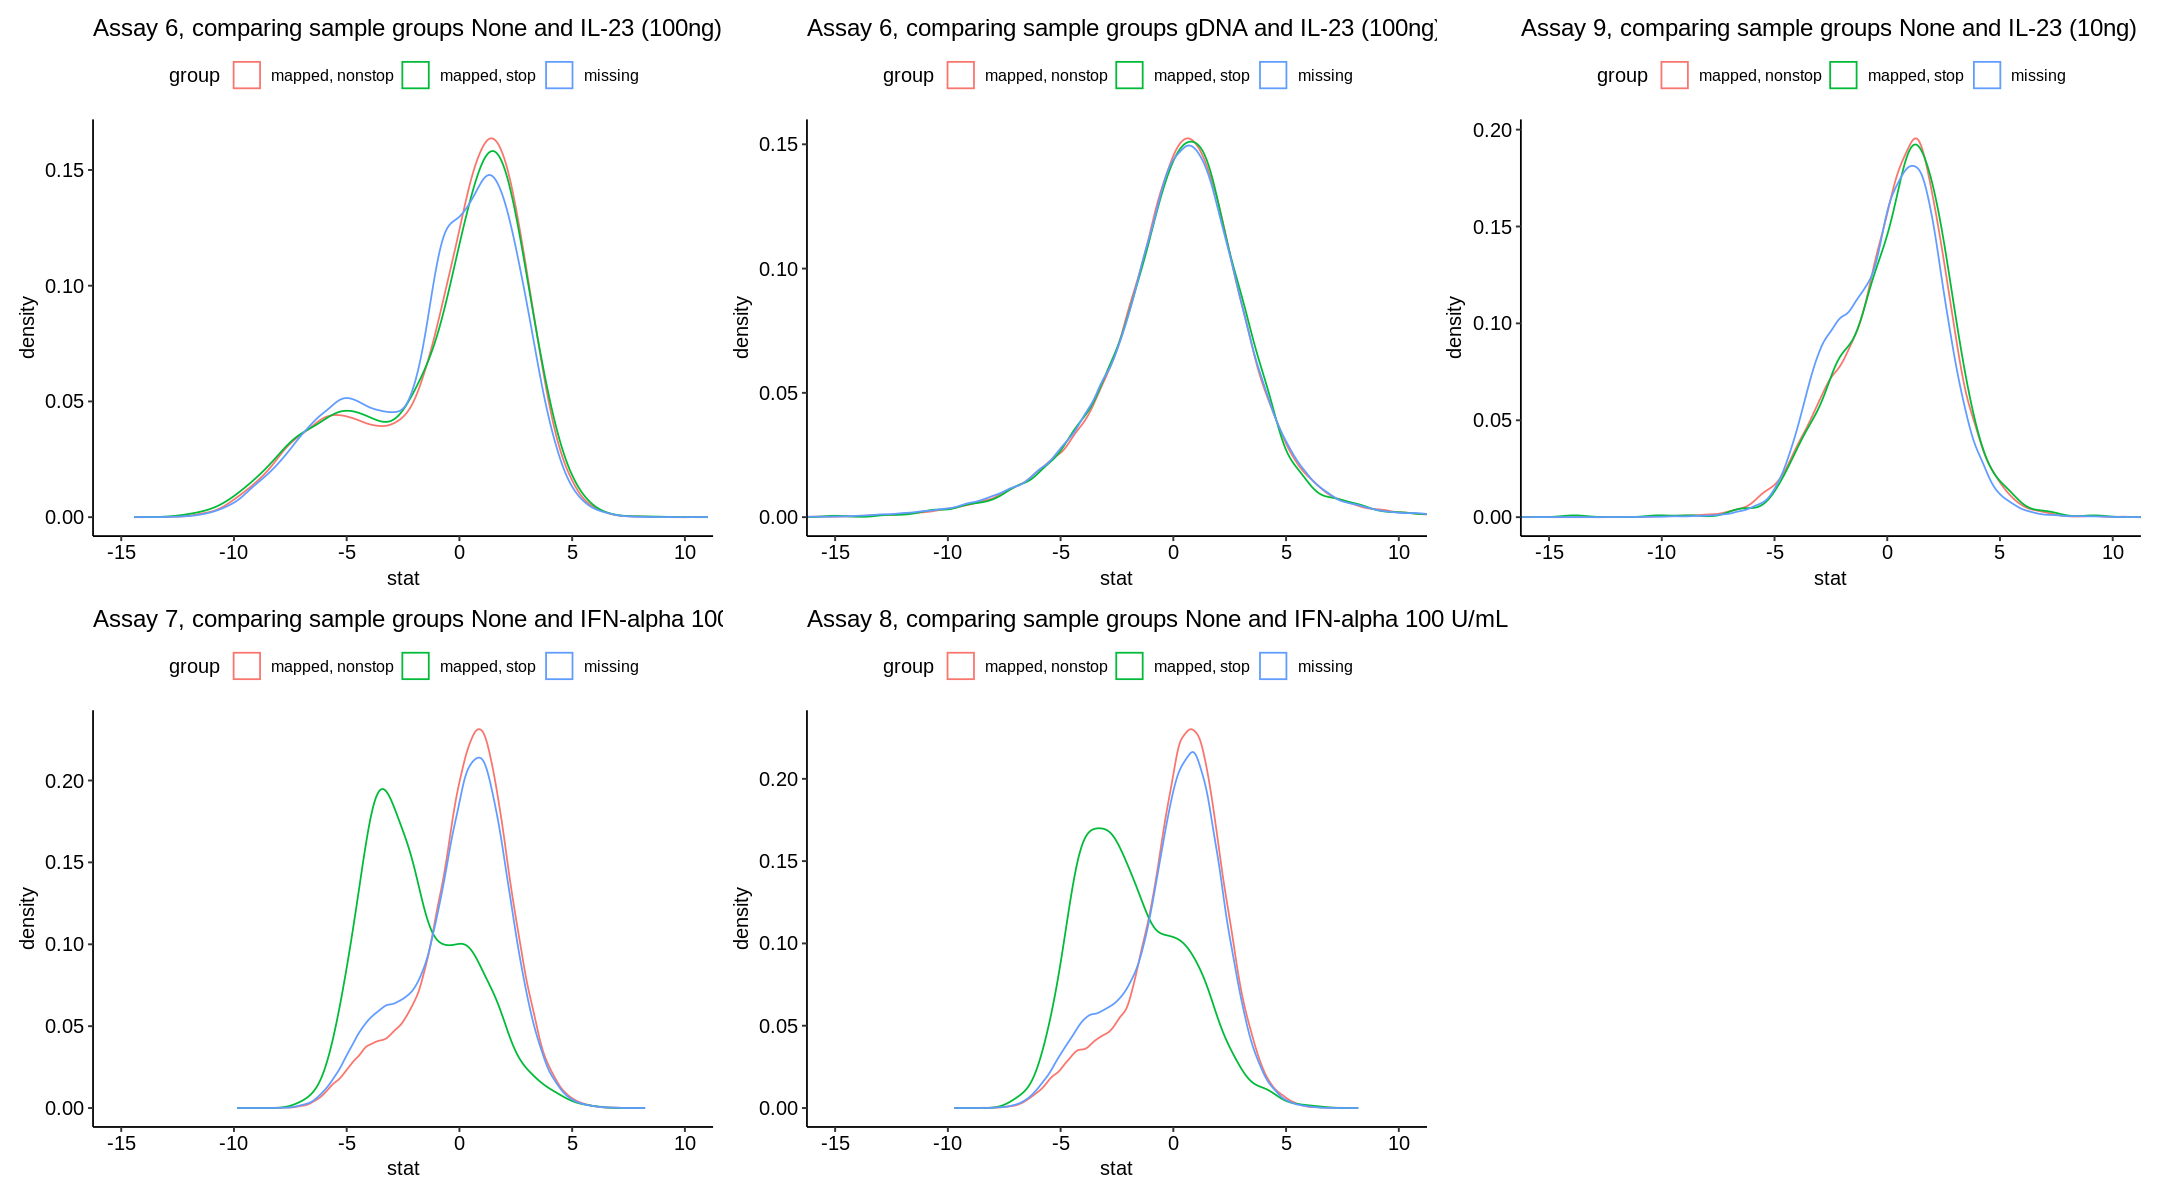

In [80]:
p1 <- assay6_sumstats_missing %>%
    mutate(stop = if_else(grepl("\\*", oligo), "stop", "nonstop"),
           group = case_when(stop == "stop" ~ "mapped, stop",
                             stop == "nonstop" & is.na(oligo) ~ "missing",
                             TRUE ~ "mapped, nonstop")) %>%
    ggplot() +
        geom_density(aes(x = stat, color = group)) +
        theme_pubr() +
        ggtitle("Assay 6, comparing sample groups None and IL-23 (100ng)")

p1g <- assay6_sumstats_missing_gdna %>%
    mutate(stop = if_else(grepl("\\*", oligo), "stop", "nonstop"),
           group = case_when(stop == "stop" ~ "mapped, stop",
                             stop == "nonstop" & is.na(oligo) ~ "missing",
                             TRUE ~ "mapped, nonstop")) %>%
    ggplot() +
        geom_density(aes(x = stat, color = group)) +
        theme_pubr() +
        ggtitle("Assay 6, comparing sample groups gDNA and IL-23 (100ng)")

p2 <- assay7_sumstats_missing %>%
    mutate(stop = if_else(grepl("\\*", oligo), "stop", "nonstop"),
           group = case_when(stop == "stop" ~ "mapped, stop",
                             stop == "nonstop" & is.na(oligo) ~ "missing",
                             TRUE ~ "mapped, nonstop")) %>%
    ggplot() +
        geom_density(aes(x = stat, color = group)) +
        theme_pubr()  +
        ggtitle("Assay 7, comparing sample groups None and IFN-alpha 100 U/mL")

p3 <- assay8_sumstats_missing %>%
    mutate(stop = if_else(grepl("\\*", oligo), "stop", "nonstop"),
           group = case_when(stop == "stop" ~ "mapped, stop",
                             stop == "nonstop" & is.na(oligo) ~ "missing",
                             TRUE ~ "mapped, nonstop")) %>%
    ggplot() +
        geom_density(aes(x = stat, color = group)) +
        theme_pubr()  +
        ggtitle("Assay 8, comparing sample groups None and IFN-alpha 100 U/mL")

p4 <- assay9_sumstats_missing %>%
    mutate(stop = if_else(grepl("\\*", oligo), "stop", "nonstop"),
           group = case_when(stop == "stop" ~ "mapped, stop",
                             stop == "nonstop" & is.na(oligo) ~ "missing",
                             TRUE ~ "mapped, nonstop")) %>%
    ggplot() +
        geom_density(aes(x = stat, color = group)) +
        theme_pubr()  +
        ggtitle("Assay 9, comparing sample groups None and IL-23 (10ng)")

options(repr.plot.width = 18, repr.plot.height = 10)
wrap_plots(list(p1, p1g, p4, p2, p3), ncol = 3, nrow = 2) & coord_cartesian(xlim = c(-15, 10))

Similarly, we can separate the scatter plots into `mapped` or `missing` categories, and then within the `mapped` category can label each point as `Stop` or `NonStop` in red. While we observe similar global barcode effect distributions in all assays, the barcode labeled as `Stop` are only shifted negative relative to all barcodes in the Assay 7 vs Asasy 8 comparison:

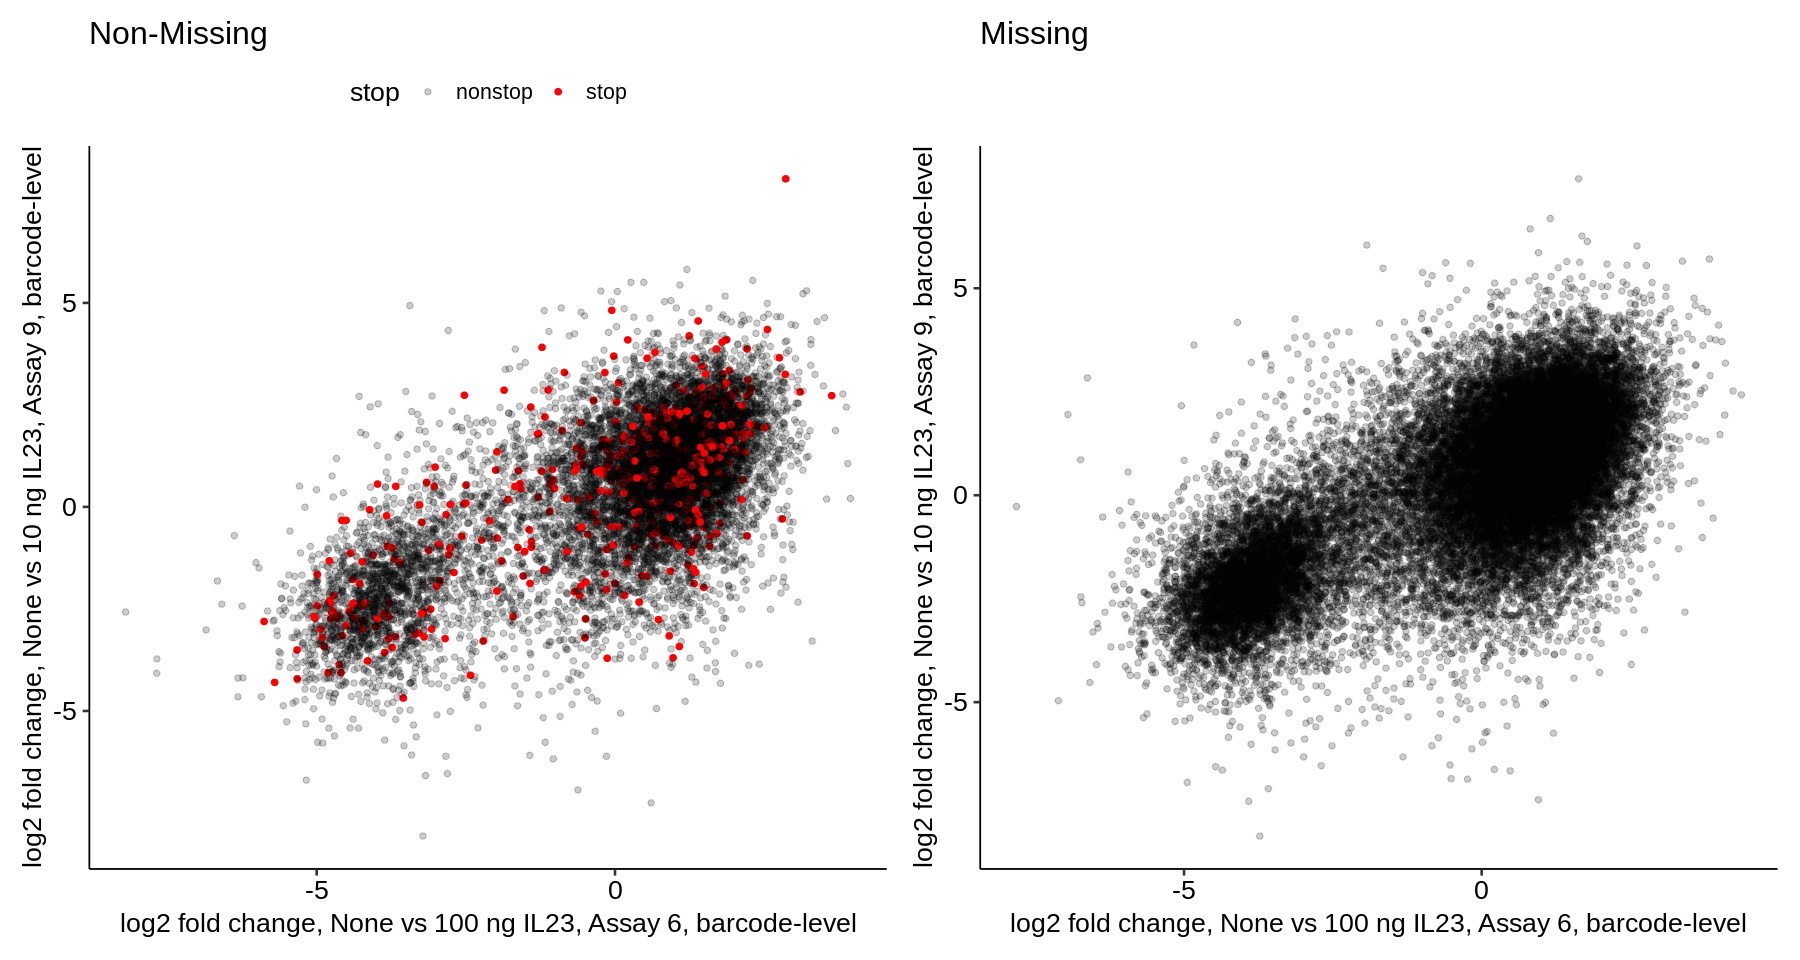

In [79]:
assay6_assay9_compare <- inner_join(assay6_sumstats_missing %>% select(log2FoldChange, barcode, oligo, status),
                                    assay9_sumstats_missing %>% select(log2FoldChange, barcode, oligo, status),
                                    by = join_by(barcode, oligo, status))

assay6_assay9_compare_present <- assay6_assay9_compare %>%
    mutate(stop = if_else(grepl("\\*", oligo), "stop", "nonstop")) %>%
    filter(status != "missing") %>% 
    ggplot() +
        geom_point(aes(x = log2FoldChange.x, y = log2FoldChange.y, color = stop, alpha = stop)) +
        theme_pubr(base_size = 16) +
        xlab("log2 fold change, None vs 100 ng IL23, Assay 6, barcode-level") +
        ylab("log2 fold change, None vs 10 ng IL23, Assay 9, barcode-level") +
        scale_color_manual(values = c("stop" = "red", "nonstop" = "black")) +
        scale_alpha_manual(values = c("stop" = 1, "nonstop" = 0.2)) +
        ggtitle("Non-Missing")

assay6_assay9_compare_missing <- assay6_assay9_compare %>%
    mutate(stop = if_else(grepl("\\*", oligo), "stop", "nonstop")) %>%
    filter(status == "missing") %>% 
    ggplot() +
        geom_point(aes(x = log2FoldChange.x, y = log2FoldChange.y), alpha = 0.2) +
        theme_pubr(base_size = 16) +
        xlab("log2 fold change, None vs 100 ng IL23, Assay 6, barcode-level") +
        ylab("log2 fold change, None vs 10 ng IL23, Assay 9, barcode-level") +
        ggtitle("Missing")

options(repr.plot.width = 15, repr.plot.height = 8)
assay6_assay9_compare_present + assay6_assay9_compare_missing

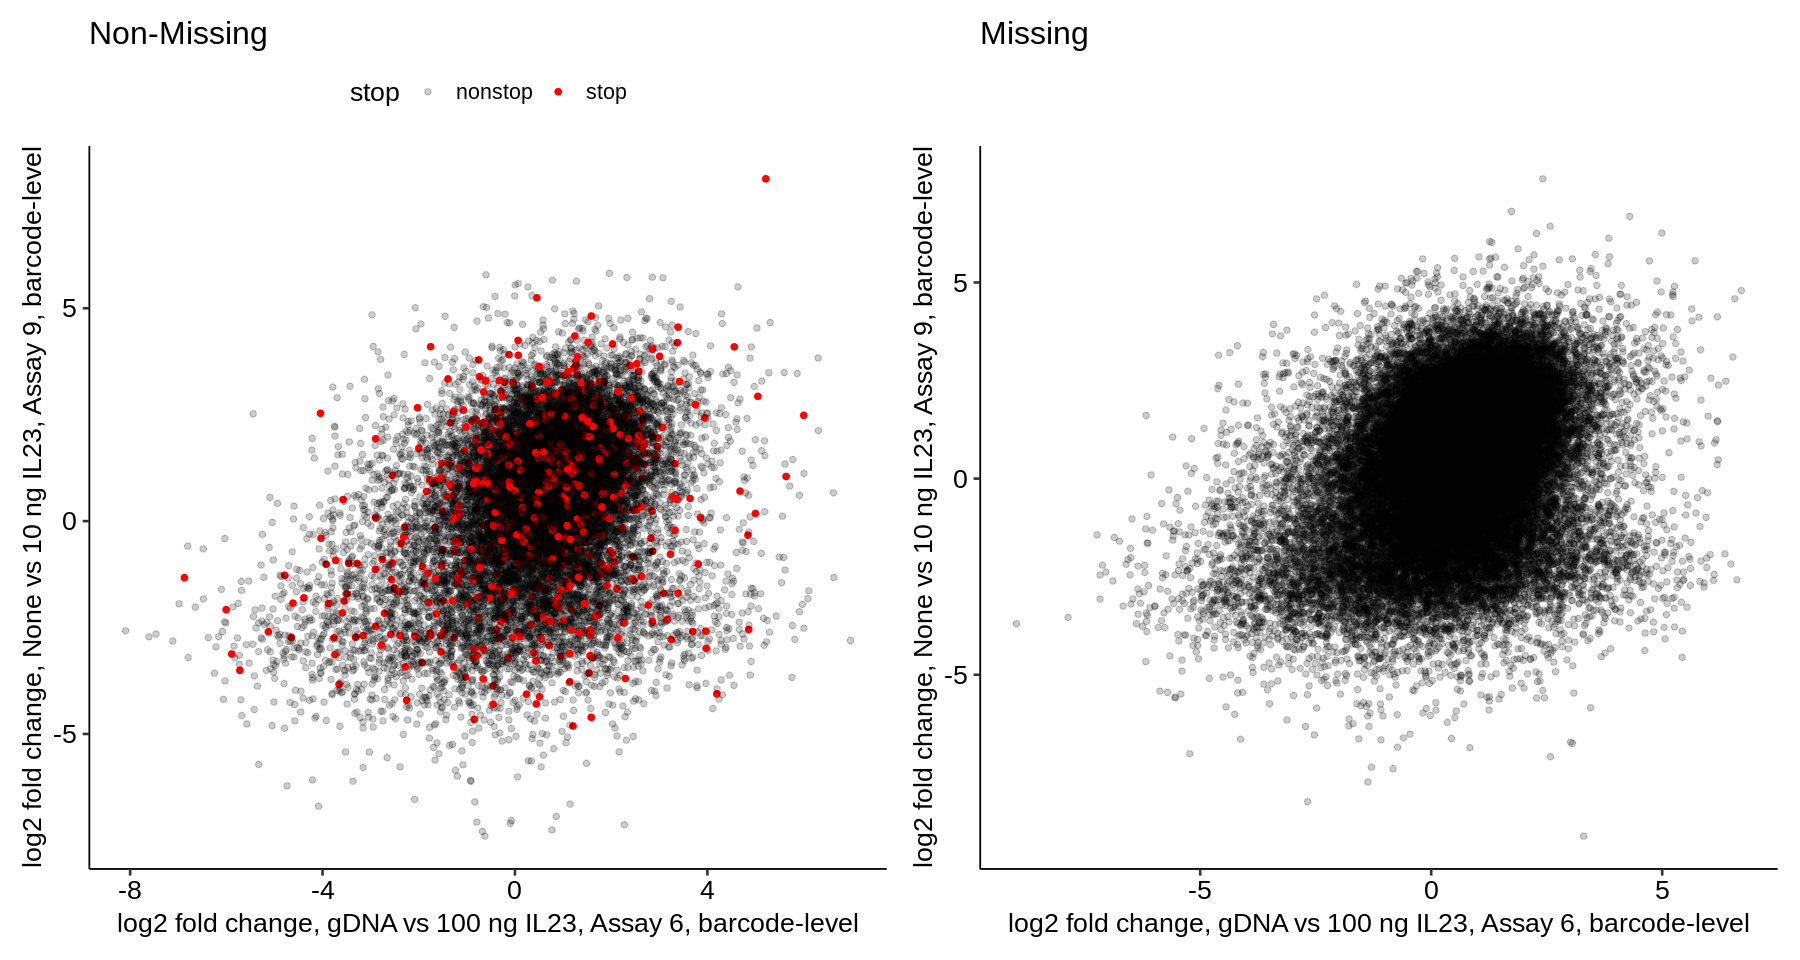

In [81]:
assay6_assay9_compare_gdna <- inner_join(assay6_sumstats_missing_gdna %>% select(log2FoldChange, barcode, oligo, status),
                                    assay9_sumstats_missing %>% select(log2FoldChange, barcode, oligo, status),
                                    by = join_by(barcode, oligo, status))

assay6_assay9_compare_present_gdna <- assay6_assay9_compare_gdna %>%
    mutate(stop = if_else(grepl("\\*", oligo), "stop", "nonstop")) %>%
    filter(status != "missing") %>% 
    ggplot() +
        geom_point(aes(x = log2FoldChange.x, y = log2FoldChange.y, color = stop, alpha = stop)) +
        theme_pubr(base_size = 16) +
        xlab("log2 fold change, gDNA vs 100 ng IL23, Assay 6, barcode-level") +
        ylab("log2 fold change, None vs 10 ng IL23, Assay 9, barcode-level") +
        scale_color_manual(values = c("stop" = "red", "nonstop" = "black")) +
        scale_alpha_manual(values = c("stop" = 1, "nonstop" = 0.2)) +
        ggtitle("Non-Missing")

assay6_assay9_compare_missing_gdna <- assay6_assay9_compare_gdna %>%
    mutate(stop = if_else(grepl("\\*", oligo), "stop", "nonstop")) %>%
    filter(status == "missing") %>% 
    ggplot() +
        geom_point(aes(x = log2FoldChange.x, y = log2FoldChange.y), alpha = 0.2) +
        theme_pubr(base_size = 16) +
        xlab("log2 fold change, gDNA vs 100 ng IL23, Assay 6, barcode-level") +
        ylab("log2 fold change, None vs 10 ng IL23, Assay 9, barcode-level") +
        ggtitle("Missing")

options(repr.plot.width = 15, repr.plot.height = 8)
assay6_assay9_compare_present_gdna + assay6_assay9_compare_missing_gdna

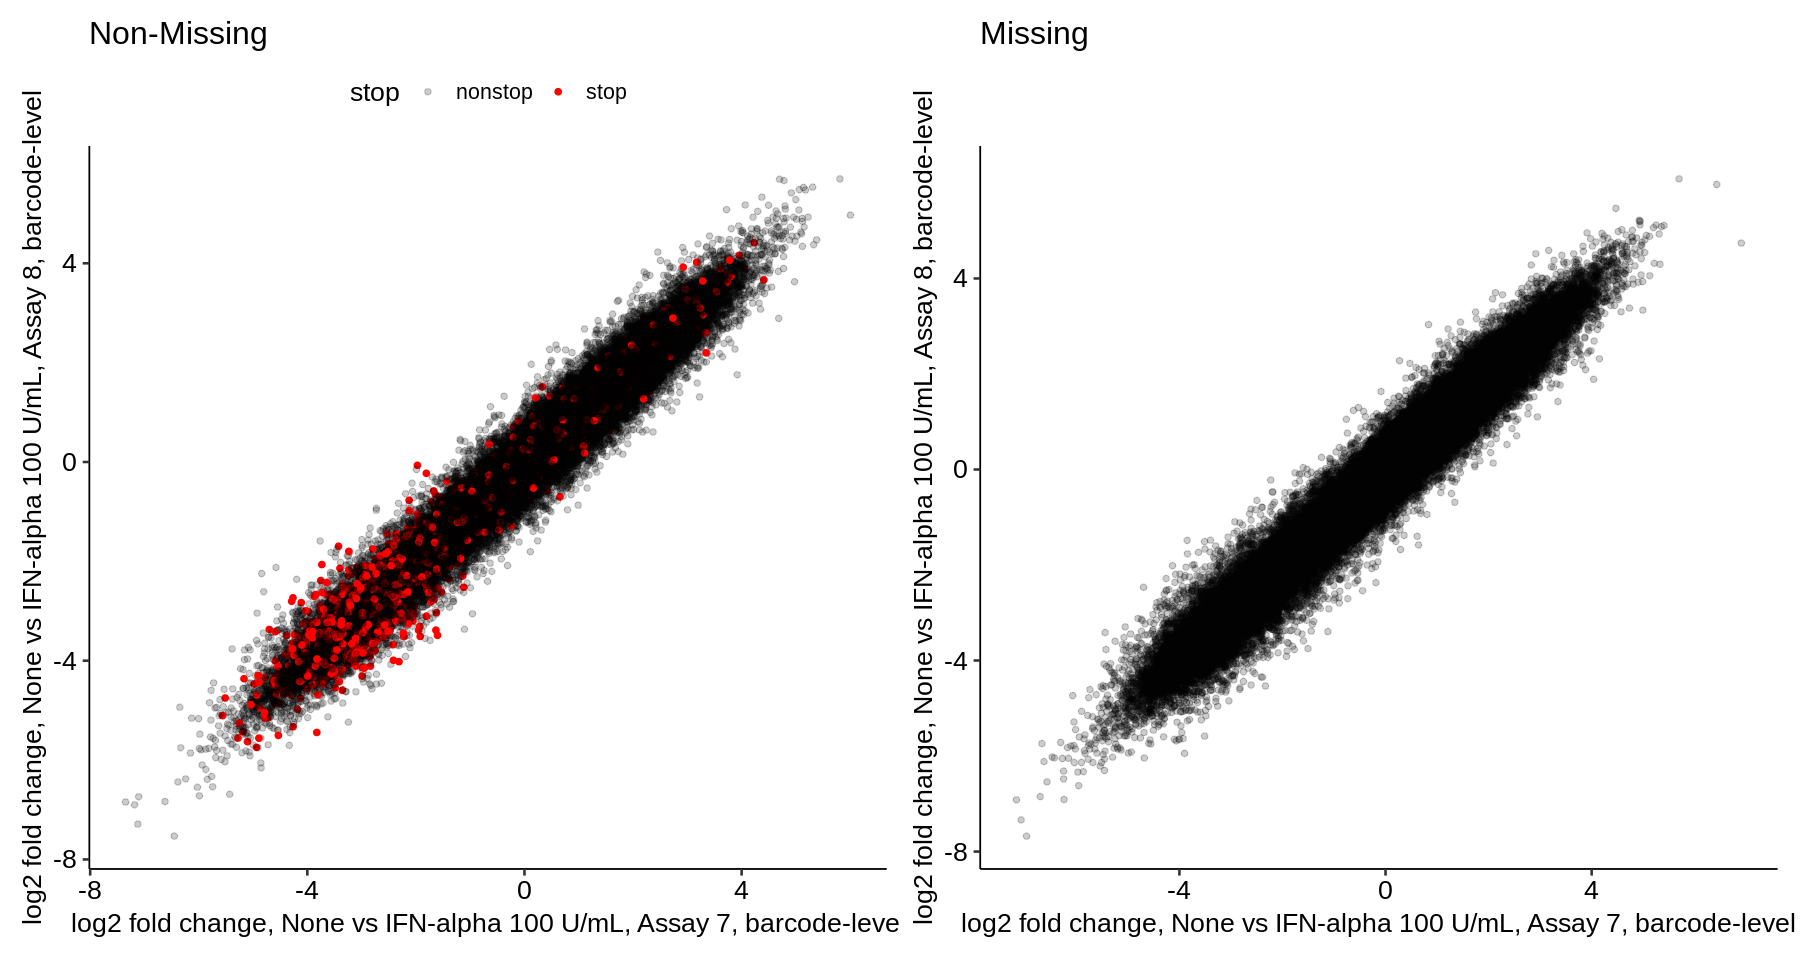

In [82]:
assay7_assay8_compare <- inner_join(assay7_sumstats_missing %>% select(log2FoldChange, barcode, oligo, status),
                                    assay8_sumstats_missing %>% select(log2FoldChange, barcode, oligo, status),
                                    by = join_by(barcode, oligo, status))

assay7_assay8_compare_present <- assay7_assay8_compare %>%
    mutate(stop = if_else(grepl("\\*", oligo), "stop", "nonstop")) %>%
    filter(status != "missing") %>% 
    ggplot() +
        geom_point(aes(x = log2FoldChange.x, y = log2FoldChange.y, color = stop, alpha = stop)) +
        theme_pubr(base_size = 16) +
        xlab("log2 fold change, None vs IFN-alpha 100 U/mL, Assay 7, barcode-level") +
        ylab("log2 fold change, None vs IFN-alpha 100 U/mL, Assay 8, barcode-level") +
        scale_color_manual(values = c("stop" = "red", "nonstop" = "black")) +
        scale_alpha_manual(values = c("stop" = 1, "nonstop" = 0.2)) +
        ggtitle("Non-Missing")

assay7_assay8_compare_missing <- assay7_assay8_compare %>%
    mutate(stop = if_else(grepl("\\*", oligo), "stop", "nonstop")) %>%
    filter(status == "missing") %>% 
    ggplot() +
        geom_point(aes(x = log2FoldChange.x, y = log2FoldChange.y), alpha = 0.2) +
        theme_pubr(base_size = 16) +
        xlab("log2 fold change, None vs IFN-alpha 100 U/mL, Assay 7, barcode-level") +
        ylab("log2 fold change, None vs IFN-alpha 100 U/mL, Assay 8, barcode-level") +
        ggtitle("Missing")

options(repr.plot.width = 15, repr.plot.height = 8)
assay7_assay8_compare_present + assay7_assay8_compare_missing

#### Characterization of Significant Barcodes  <a name="part6"></a>

Based on the non-missing scatterplot for the Assay 6 vs Assay 9 comparison, we can extract barcodes which show a significant decrease in expression upon IL-23 treatment compared to Untreated in both Assay 6 and Assay 9 (i.e. they are in the lower left cluster in those scatterplots). From the scatter plot, we know that this will not _disproportionately_ include stop barcodes, but we can nonetheless extract the total list:

In [80]:
assay6_assay9_compare <- inner_join(assay6_sumstats_missing %>% select(log2FoldChange, padj, barcode, oligo, status),
                                    assay9_sumstats_missing %>% select(log2FoldChange, padj, barcode, oligo, status),
                                    by = join_by(barcode, oligo, status))

assay6_assay9_compare_sig <- assay6_assay9_compare %>%
    filter(log2FoldChange.x < 0,
           log2FoldChange.y < 0,
           padj.x < 0.01,
           padj.y < 0.01) %>%
    mutate(stop = if_else(grepl("\\*", oligo), "stop", "nonstop"),
           stop = if_else(status == "missing", "missing", stop))

assay6_assay9_compare_sig %>%
    count(status, stop) %>%
    rename("mapped oligo" = "stop") %>%
    kable("markdown")



|status  |mapped oligo |    n|
|:-------|:------------|----:|
|mapped  |nonstop      |  876|
|mapped  |stop         |   43|
|missing |missing      | 2761|

These barcodes are present in all samples in both Assay 6 and Assay 9, but only a few are associated with Stop oligos while the vast majority are non-stop or missing. We can collapse the sequences of each set of barcodes shown in the above table, which verifies (as expected) a chunk 16 signature as that is the only overlapping chunk between these two assays:

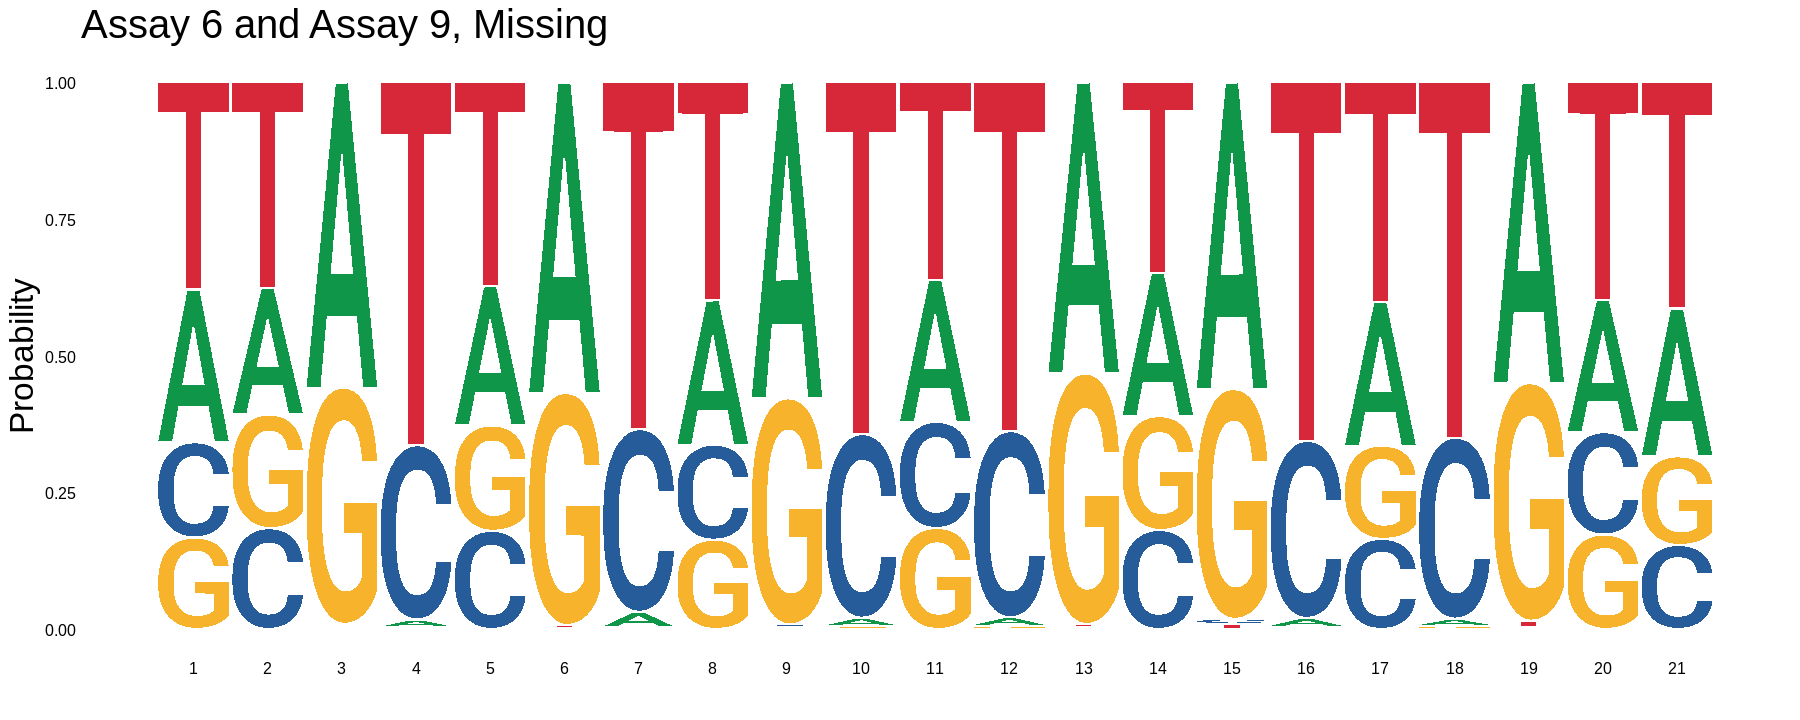

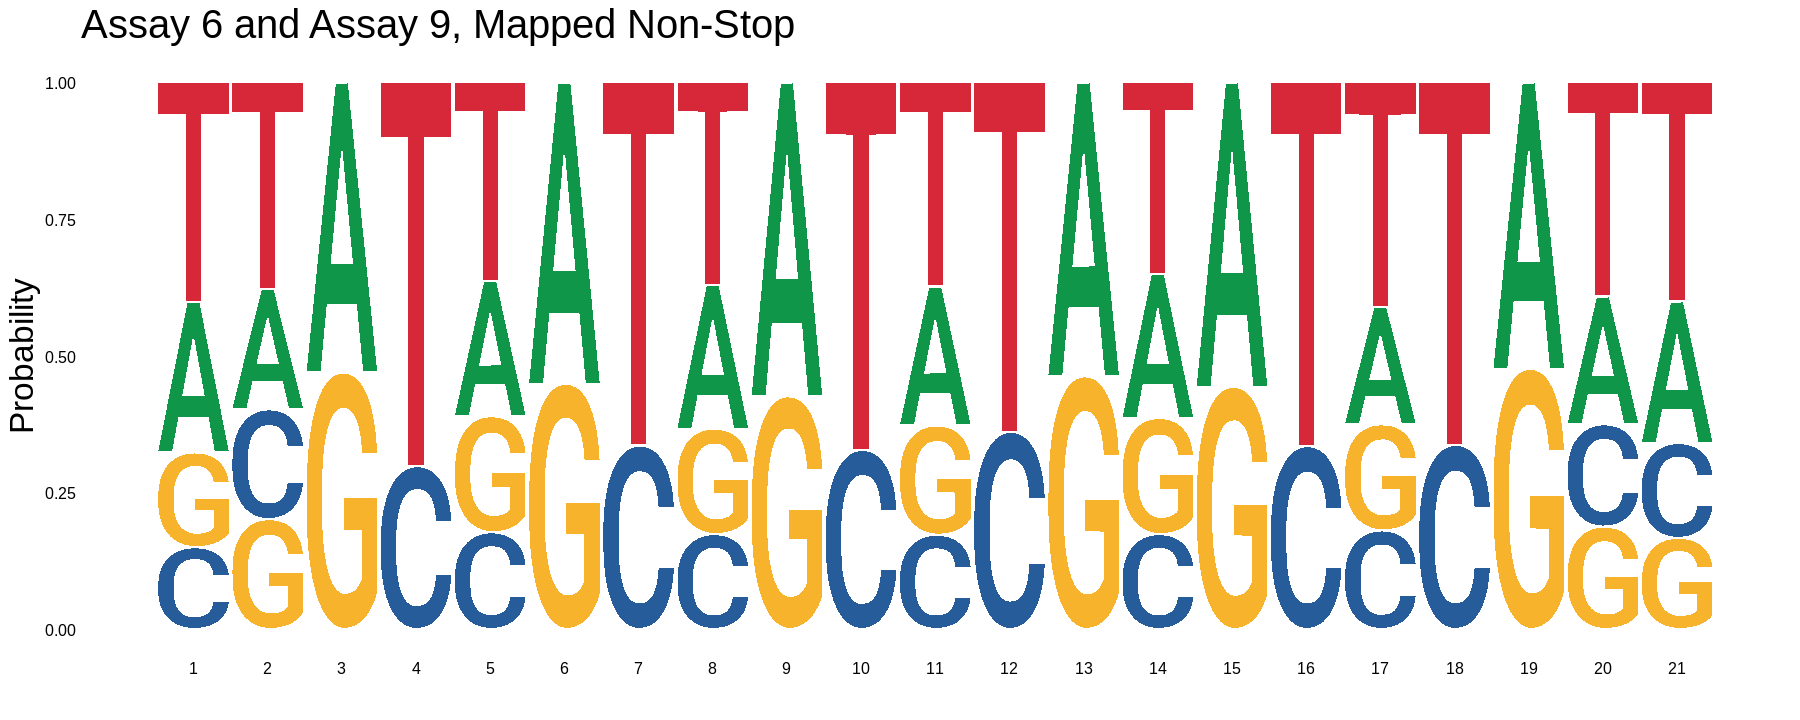

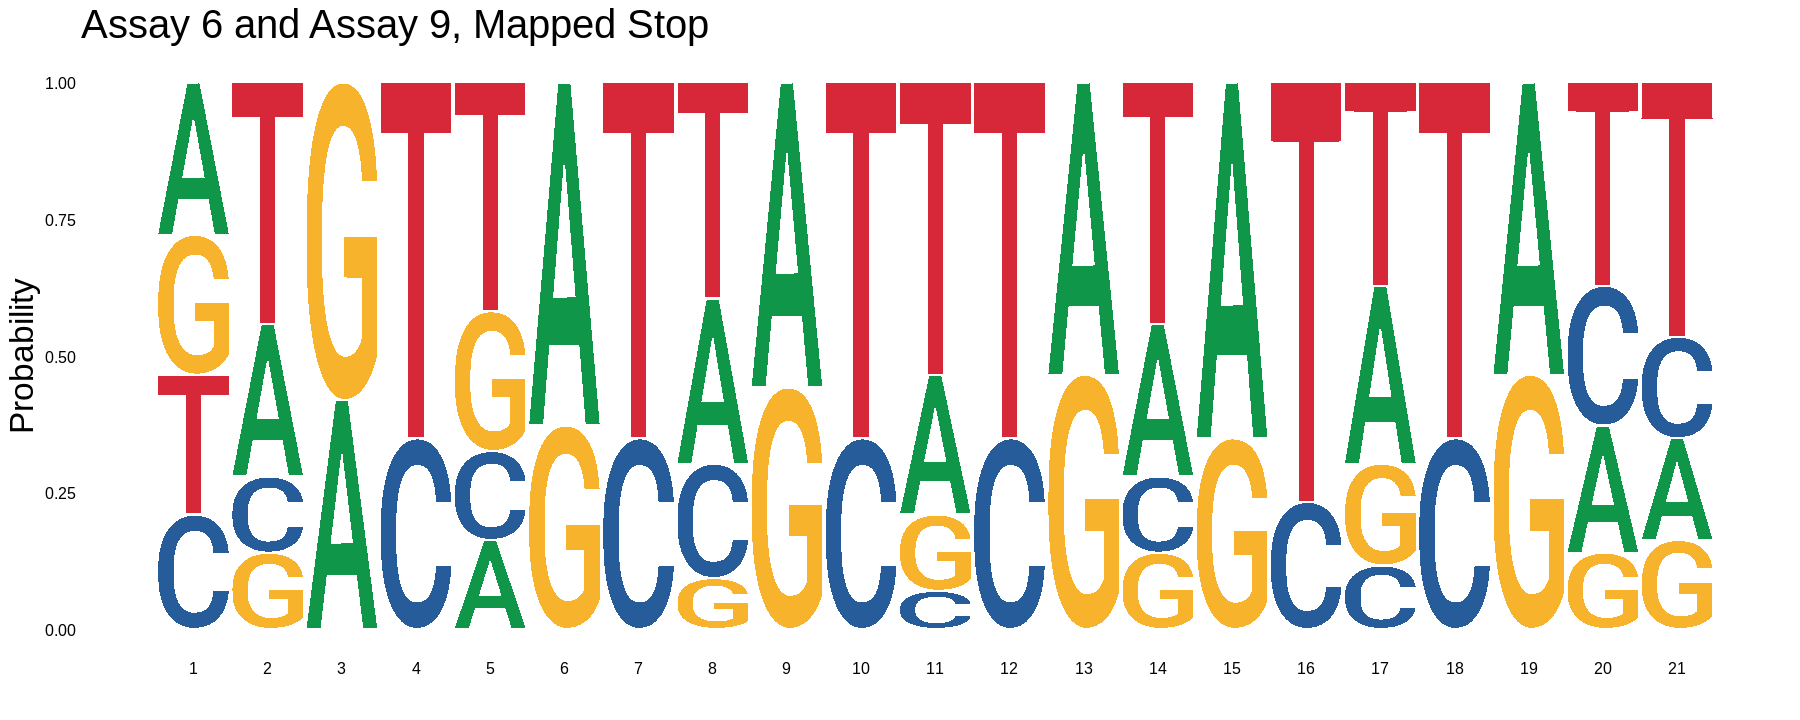

In [94]:
options(repr.plot.width = 15, repr.plot.height = 6)
ggseqlogo(assay6_assay9_compare_sig %>% filter(status == "missing") %>% pull(barcode), method = "prob") +
    ggtitle("Assay 6 and Assay 9, Missing") + theme(title = element_text(size = 20))

ggseqlogo(assay6_assay9_compare_sig %>% filter(status == "mapped", stop == "nonstop") %>% pull(barcode), method = "prob") +
    ggtitle("Assay 6 and Assay 9, Mapped Non-Stop") + theme(title = element_text(size = 20))

ggseqlogo(assay6_assay9_compare_sig %>% filter(status == "mapped", stop == "stop") %>% pull(barcode), method = "prob") +
    ggtitle("Assay 6 and Assay 9, Mapped Stop") + theme(title = element_text(size = 20))
    

#### Assay 6 Barcode Heatmaps  <a name="part7"></a>

In [ ]:
bc_dir <- "../pipeline/OCNT-DMSLIB-1-assay-run6/"
files <- dir_ls(bc_dir, glob = "*/*bcs.tsv")
names(files) <- gsub(str_c(bc_dir, "|.rna-bcs.tsv"), "", files)
assay6_mat_gdna <- load_assay_data(files, 12)

In [12]:
coldata <- tibble("group" = c(rep("untreated",4), rep("il23",4), rep("gdna",4)))
coldata$group <- relevel(factor(coldata$group), ref = "untreated")
rownames(coldata) <- names(assay6_mat_gdna)[-1]

dds <- DESeqDataSetFromMatrix(assay6_mat_gdna[,-1], colData = coldata, design = ~group)
dds <- DESeq(dds, test="LRT", reduced=~1)

res <- results(dds) %>% as_tibble() %>% mutate(num = row_number()) %>% arrange(padj)
vsd <- assay(vst(dds, blind=FALSE)) %>% as_tibble()
vsd_top <- vsd[res$num[1:20000], ]

Warning message:
“Setting row names on a tibble is deprecated.”
converting counts to integer mode

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [12]:
distmat <- parDist(x = as.matrix(vsd_top), threads = 50)

In [13]:
hc <- fastcluster::hclust(d = distmat,
                          method = "average")

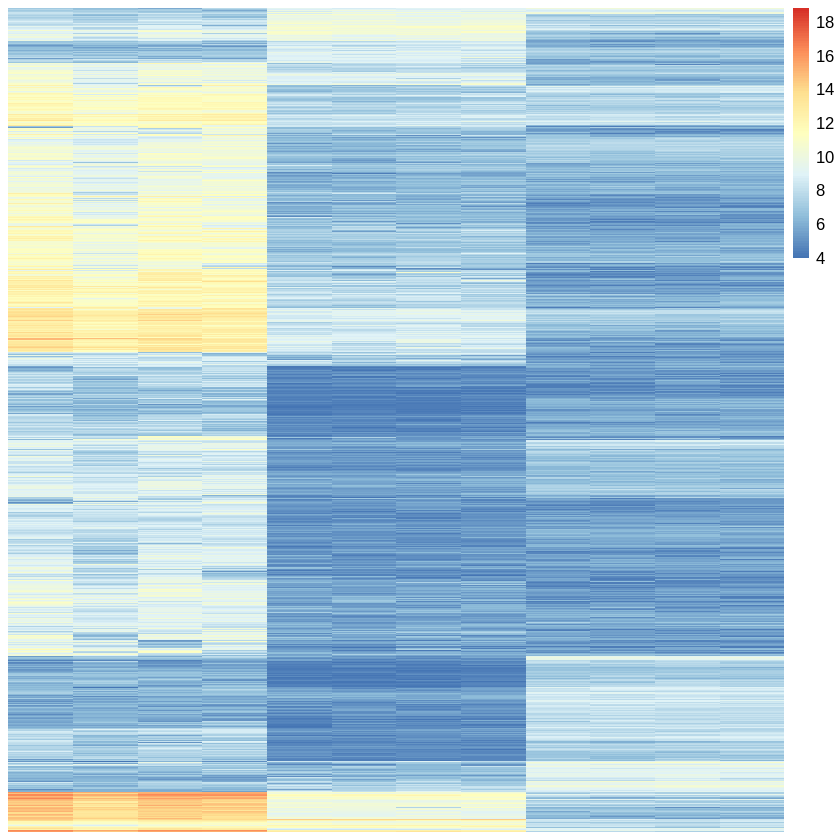

In [16]:
pheatmap(vsd_top[hc$order,],
         cluster_rows = FALSE,
         cluster_cols = FALSE,
         show_colnames = FALSE,
         show_rownames = FALSE)